In [4]:
from sklearn.datasets import make_regression

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [5]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

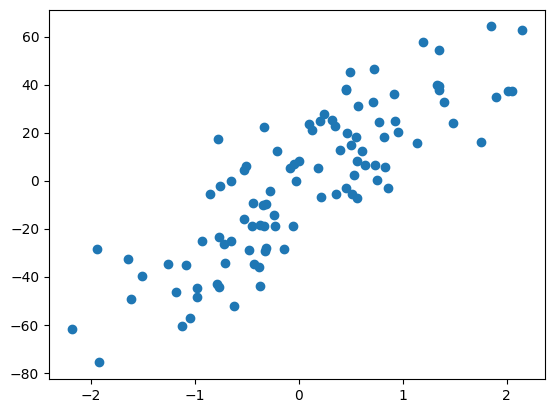

In [6]:
plt.scatter(X,y)

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

[27.82809103]
-2.29474455867698


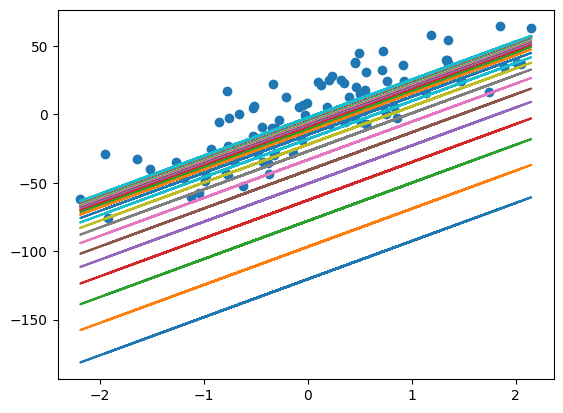

In [8]:
b = -150
m = 27.82
lr = 0.001
all_b = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope = 0
    cost = 0
    for j in range(X.shape[0]):
        slope = slope - 2*(y[j] - (m * X[j]) -  b)
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope)
    all_b.append(b)
    all_cost.append(cost)
    y_pred = m * X + b
    plt.plot(X,y_pred)
plt.scatter(X,y)

In [9]:
all_b = np.array(all_b).ravel()

In [10]:
all_b

array([-120.4588544 ,  -96.82593791,  -77.91960473,  -62.79453818,
        -50.69448494,  -41.01444235,  -33.27040827,  -27.07518102,
        -22.11899921,  -18.15405376,  -14.98209741,  -12.44453232,
        -10.41448025,   -8.7904386 ,   -7.49120528,   -6.45181862,
         -5.62030929,   -4.95510183,   -4.42293586,   -3.99720308,
         -3.65661686,   -3.38414789,   -3.16617271,   -2.99179256,
         -2.85228845,   -2.74068515,   -2.65140252,   -2.57997641,
         -2.52283553,   -2.47712282])

In [11]:
all_cost = np.array(all_cost).ravel()
all_cost

array([2210040.49020261, 1424629.13499295,  921965.86765877,
        600261.37656489,  394370.50226481,  262600.34271276,
        178267.44059944,  124294.38324692,   89751.62654131,
         67644.26224972,   53495.5491031 ,   44440.37268926,
         38645.05978441,   34936.0595253 ,   32562.29935947,
         31043.09285334,   30070.80068942,   29448.5337045 ,
         29050.28283416,   28795.40227714,   28632.27872065,
         28527.87964449,   28461.06423575,   28418.30237416,
         28390.93478274,   28373.41952423,   28362.20975879,
         28355.0355089 ,   28350.44398898,   28347.50541622])

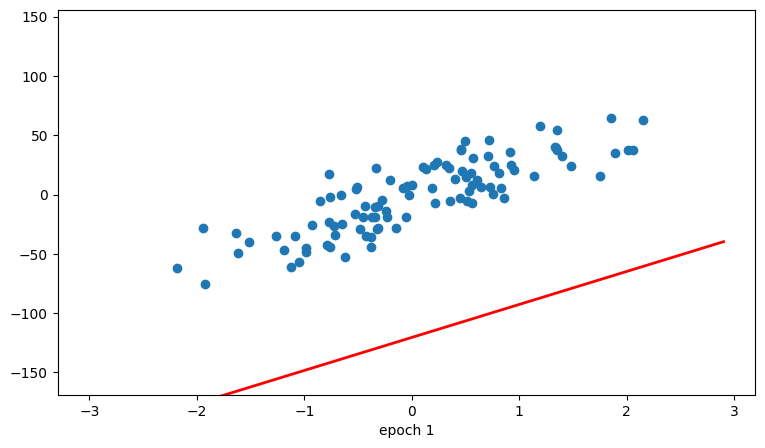

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

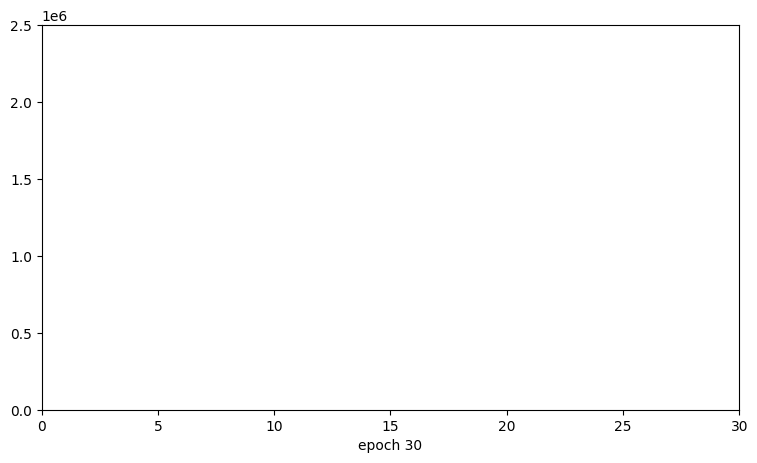

In [17]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# DEFINE EPOCH DATA
num_epochs = list(range(len(all_cost)))   # <-- FIX
# OR: num_epochs = list(range(30))

fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim=(0, len(num_epochs)), ylim=(0, 2500000))

line, = axis.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = num_epochs[:i+1]
    y = all_cost[:i+1]
    line.set_data(x, y)
    axis.set_xlabel(f'epoch {i+1}')
    return line,

anim = FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=len(num_epochs),
    interval=500,
    repeat=False
)

writer = PillowWriter(fps=2)
anim.save("animation1.gif", writer=writer)



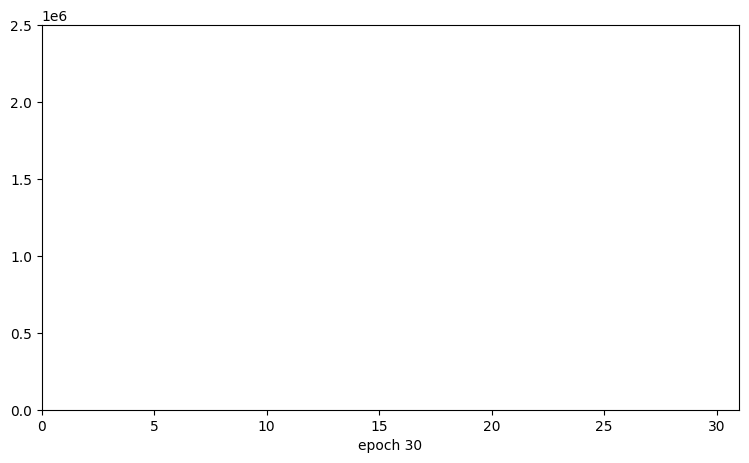

In [18]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

fig = plt.figure(figsize=(9,5))
axis = plt.axes(xlim=(0, 31), ylim=(0, 2500000))

line, = axis.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = num_epochs[:i+1]
    y = all_cost[:i+1]
    line.set_data(x, y)
    axis.set_xlabel(f'epoch {i+1}')
    return line,

anim = FuncAnimation(
    fig,
    animate,
    init_func=init,
    frames=len(num_epochs),
    interval=500,
    repeat=False
)

writer = PillowWriter(fps=2)
anim.save("animation1.gif", writer=writer)


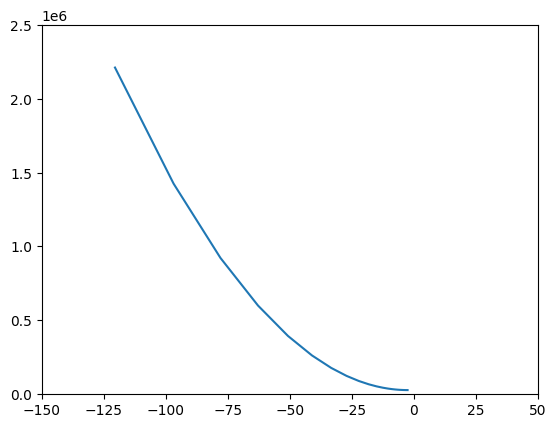

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

fig, ax = plt.subplots()
ax.plot(all_b, all_cost)
x, y = [],[]
sc = ax.scatter(x,y,color='red',marker='+')
plt.xlim(-150,50)
plt.ylim(0,2500000)

def animate(i):
    label = 'epoch {0}'.format(i + 1)
    x.append(all_b[i])
    y.append(all_cost[i])
    sc.set_offsets(np.c_[x,y])
    ax.set_xlabel(label)

ani = matplotlib.animation.FuncAnimation(fig, animate, 
                frames=30, interval=500, repeat=True) 
plt.show()

f = r"animation3.gif" 
writergif = animation.PillowWriter(fps=2) 
ani.save(f, writer=writergif)

In [20]:
b_input = np.linspace(-150,150,100)

In [22]:
cost_input = []

X_flat = X.flatten()

for i in range(len(b_input)):
    this_cost = 0
    for j in range(len(y)):
        this_cost += (y[j] - m * X_flat[j] - b_input[i])**2
    cost_input.append(this_cost)

print(cost_input)


[13316746661029.996, 13316691356864.826, 13316636053268.979, 13316580750242.467, 13316525447785.283, 13316470145897.434, 13316414844578.904, 13316359543829.709, 13316304243649.84, 13316248944039.303, 13316193644998.09, 13316138346526.219, 13316083048623.674, 13316027751290.455, 13315972454526.568, 13315917158332.016, 13315861862706.781, 13315806567650.879, 13315751273164.314, 13315695979247.078, 13315640685899.17, 13315585393120.59, 13315530100911.336, 13315474809271.416, 13315419518200.824, 13315364227699.564, 13315308937767.63, 13315253648405.023, 13315198359611.758, 13315143071387.81, 13315087783733.205, 13315032496647.918, 13314977210131.96, 13314921924185.34, 13314866638808.049, 13314811354000.082, 13314756069761.45, 13314700786092.14, 13314645502992.168, 13314590220461.523, 13314534938500.201, 13314479657108.215, 13314424376285.555, 13314369096032.225, 13314313816348.229, 13314258537233.557, 13314203258688.23, 13314147980712.215, 13314092703305.54, 13314037426468.191, 13313982150